# Notes


## Import dependencies

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

## Define a function

### For scatter plots

In [56]:
spotify_green = (44/255, 219/255, 58/255)

In [70]:
plt.style.use('ggplot')

In [65]:
def scatter_regress(x_data, y_data, x_name, y_name):

    # to find the values
    correlation, pvalue = st.pearsonr(x_data, y_data)
    rvalue = abs(correlation)
    slope, intercept = np.polyfit(x_data, y_data, 1)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # to generate the scatter plot
    plot = plt.scatter(x_data, y_data, marker='o', color='lime', edgecolors=spotify_green)
    plt.plot(x_data, slope * x_data + intercept, color='red', label='Line of Best Fit')
    plt.title(f"{x_name} by {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.text(np.min(x_data), np.min(y_data), equation, fontsize=12, color='red', verticalalignment='bottom', horizontalalignment='left')
    plt.show()
    plt.savefig(f"scatter_{x_name}_by_{y_name}.png")
    print(f"r-value: {round(rvalue, 3)}")
    
    return rvalue, pvalue, slope, intercept, equation, plot

## Read in the data

In [11]:
# read in data
file = 'universal_top_spotify_songs.csv'
rawdata = pd.read_csv(file)

In [12]:
print(type(rawdata))
print(list(rawdata.columns.values))

<class 'pandas.core.frame.DataFrame'>
['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement', 'country', 'snapshot_date', 'popularity', 'is_explicit', 'duration_ms', 'album_name', 'album_release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


## Filter the data

### Filter for countries selected for analysis

In [13]:
relevant_countries = ['US', 'CA', 'BR', 'AR', 'GB', 'DE', 'KR', 'JP', 'NG', 'ZA', 'AU', 'NZ']
data = rawdata[rawdata['country'].isin(relevant_countries)]
data

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
50,5yyYL1FpimADTIftYQU0cg,iPlan,"Dlala Thukzin, Zaba, Sykes",1,0,0,ZA,2023-11-09,68,False,...,5,-10.253,0,0.0384,0.07090,0.584000,0.1010,0.748,118.004,4
51,5C9h6ZyskUiyAVDmhSfSdP,Imnandi lento (feat. Tman Xpress),"Mellow & Sleazy, SjavasDaDeejay, TitoM, Tman X...",2,0,0,ZA,2023-11-09,70,False,...,6,-13.325,0,0.0667,0.06000,0.000776,0.0231,0.632,111.982,4
52,7JbLSEDlRdoJaXk5ddZae2,Paris,"Mthandeni SK, Lwah Ndlunkulu",3,0,2,ZA,2023-11-09,64,False,...,1,-4.659,1,0.0693,0.02960,0.001990,0.1900,0.964,154.639,4
53,6Kijtp0DB6VwcoJIw7PJ9W,"Imithandazo (feat. Young Stunna, DJ Maphorisa,...","Kabza De Small, Mthunzi, DJ Maphorisa, Young S...",4,4,5,ZA,2023-11-09,59,False,...,6,-9.686,0,0.1120,0.17900,0.001260,0.1820,0.795,113.001,4
54,4URabg9AGHasjFEVdTbWcC,Dalie (feat. Baby S.O.N),"Kamo Mphela, Tyler ICU, Khalil Harrison, Baby ...",5,-1,-2,ZA,2023-11-09,46,False,...,1,-9.984,1,0.0515,0.00005,0.090100,0.1220,0.160,113.009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83829,3WndNMJo029mMO64l9hGFm,Dale Mecha,Mesita,46,4,0,AR,2023-10-18,78,False,...,4,-4.360,0,0.4310,0.30000,0.000000,0.1060,0.441,146.286,3
83830,6abr2lKyMZTy21gSPWm7aG,Entre Beso y Beso,Ke Personajes,47,3,0,AR,2023-10-18,76,False,...,10,-1.669,0,0.0536,0.57000,0.000000,0.2060,0.906,85.962,4
83831,7BVMtLpd7edHeOizt4RWz9,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",48,2,0,AR,2023-10-18,78,False,...,6,-4.515,1,0.0309,0.36500,0.000000,0.1120,0.393,149.918,4
83832,4qSEvFGCpde73gqIuq3sho,HIBIKI,"Bad Bunny, Mora",49,1,0,AR,2023-10-18,88,True,...,6,-5.605,0,0.0706,0.60400,0.000000,0.1180,0.528,119.935,4


### Extract data for analysis
- 'popularity' vs. 'danceability'
- 'popularity' vs. 'energy'
- 'popularity' vs. 'acousticness'
- 'popularity' vs. 'instrumentalness'
- 'popularity' vs 'album_release_date'

In [73]:
popularity = data['popularity']
dance = data['danceability']
acoustics = data['acousticness']
instrument = data['instrumentalness']
release = data['album_release_date']

### Generate plots

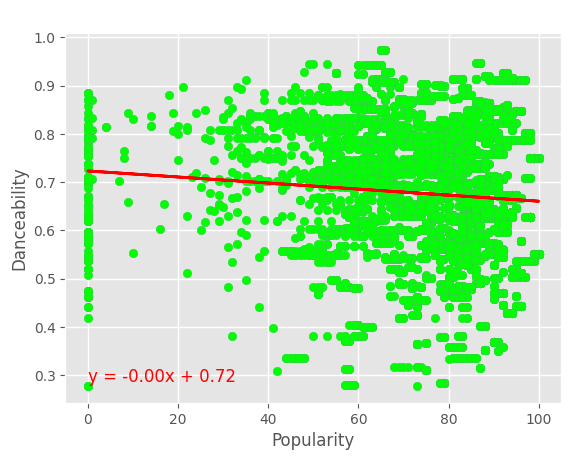

r-value: 0.074


(0.0743600705012486,
 2.0777912472120453e-18,
 -0.000627092384292498,
 0.7233271559831328,
 'y = -0.00x + 0.72',
 <matplotlib.collections.PathCollection at 0x17dfbba10>)

<Figure size 640x480 with 0 Axes>

In [66]:
scatter_regress(popularity, dance, 'Popularity', 'Danceability')

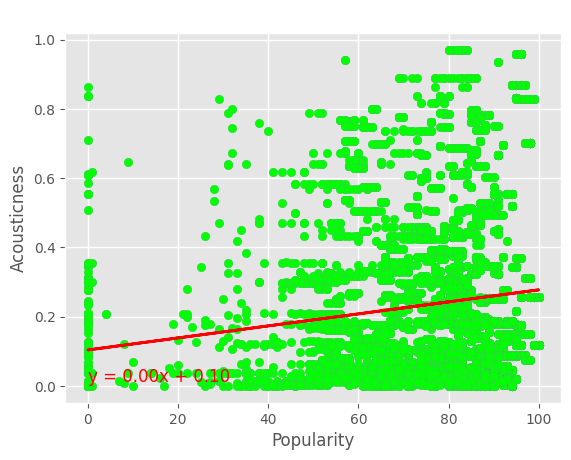

r-value: 0.118


(0.11816625421292443,
 3.6679379839175617e-44,
 0.0017353277826546803,
 0.10385473735897004,
 'y = 0.00x + 0.10',
 <matplotlib.collections.PathCollection at 0x17e05e7d0>)

<Figure size 640x480 with 0 Axes>

In [67]:
scatter_regress(popularity, acoustics, 'Popularity', 'Acousticness')

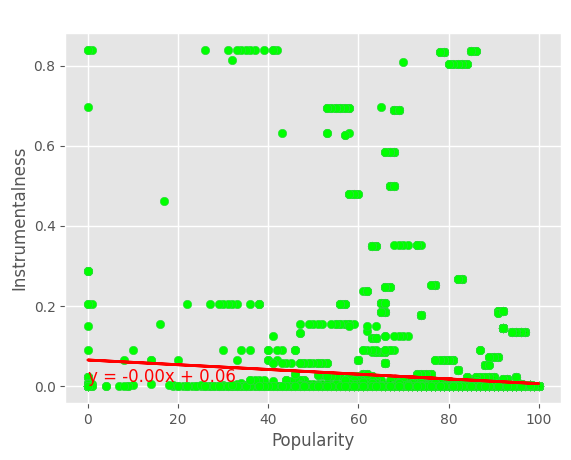

r-value: 0.109


(0.10873140131770084,
 1.2807355970257456e-37,
 -0.0005916843646499131,
 0.06475777660557083,
 'y = -0.00x + 0.06',
 <matplotlib.collections.PathCollection at 0x282ad8290>)

<Figure size 640x480 with 0 Axes>

In [68]:
scatter_regress(popularity, instrument, 'Popularity', 'Instrumentalness')

<Figure size 200x400 with 0 Axes>

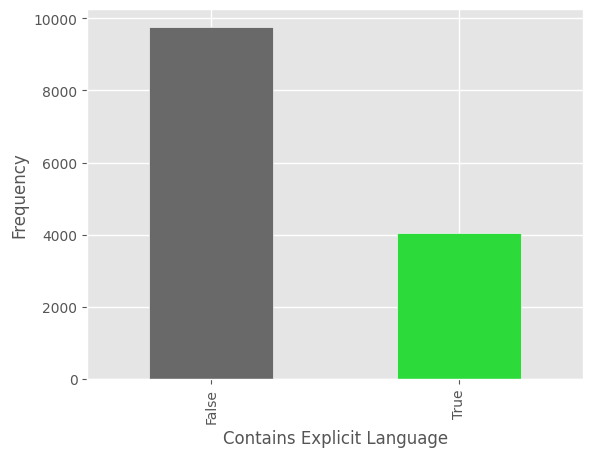

<Figure size 200x400 with 0 Axes>

In [89]:
explicit = data['is_explicit'].value_counts()
explicit.plot(kind='bar', color=['dimgray', spotify_green], edgecolor='whitesmoke')
plt.xlabel('Contains Explicit Language')
plt.ylabel('Frequency')
plt.figure(figsize=(2, 4))

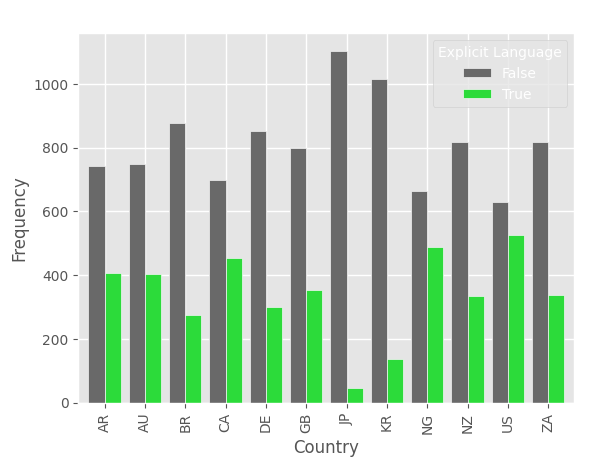

In [84]:
grouped_data = data.groupby(['country', 'is_explicit']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', color=['dimgray', spotify_green], edgecolor='whitesmoke', width=0.8)

plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Explicit Language Grouped by Country')
plt.legend(title='Explicit Language', loc='upper right')

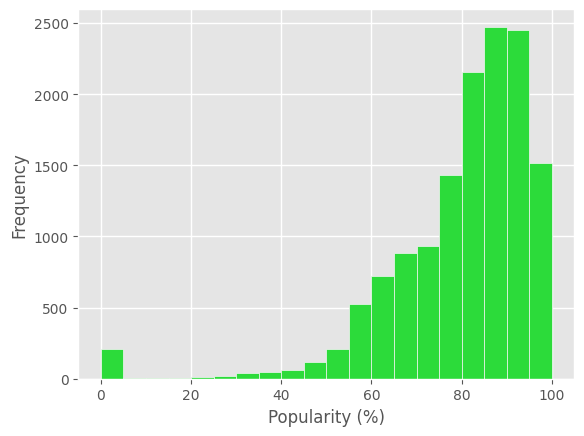

In [55]:
plt.hist(data['popularity'], bins=20, color=spotify_green, edgecolor='whitesmoke')
plt.xlabel('Popularity (%)')
plt.ylabel('Frequency')
plt.style.use('ggplot')

In [ ]:
data['popularity'].mean()

79.56186685962373